In [1]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from keras import layers
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

2021-11-17 12:12:11.023759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-17 12:12:11.023803: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Loading Dataset
# Dataset link: https://data.mendeley.com/datasets/xvyv59vwvz/1
# Dataset is present in the current directory containing the code file.
df=pd.read_csv('../Datasets/ClaMP_Integrated-5184.csv')

## Preprocessing

In [4]:
df.head()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0


In [5]:
# Replacing Null values with 0. ML classifer cannot learn on Null values
df.fillna(0, inplace=True)

In [6]:
# Peak on dataset
df.head()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0


In [7]:
# Droping these columns due to their insignificance
df=df.drop(['NumberOfSections','CreationYear','e_cblp','e_cp','e_cparhdr','e_maxalloc'], axis=1)

In [8]:
df.shape

(5210, 64)

In [9]:
# Peak on the dataset
df.head()

,e_sp,e_lfanew,FH_char0,FH_char1,FH_char2,FH_char3,FH_char4,FH_char5,FH_char6,FH_char7,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,184,256,0,1,0,0,0,0,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,184,184,0,1,1,1,0,0,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,184,272,0,1,0,0,0,0,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,184,184,0,1,0,0,0,0,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,184,224,0,1,0,0,0,0,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0


In [10]:
# Encodings Labels so that they are compatible with machine leanring classifiers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])
    else:
        continue
X = df.drop(['class'],axis=1)
y = df['class']

In [11]:
# Now check the features for the feature column "Packer_type". They are converted fr
df.head()

,e_sp,e_lfanew,FH_char0,FH_char1,FH_char2,FH_char3,FH_char4,FH_char5,FH_char6,FH_char7,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,184,256,0,1,0,0,0,0,0,1,...,1,3,0,18,6.603616,5.443362,1181520,6.627552,1,0
1,184,184,0,1,1,1,0,0,0,1,...,1,3,0,18,5.205926,2.123522,7680,5.318221,0,0
2,184,272,0,1,0,0,0,0,0,1,...,1,4,0,18,6.238000,3.380859,57872,6.507758,1,0
3,184,184,0,1,0,0,0,0,0,1,...,0,1,0,18,0.000000,0.000000,95616,4.575092,1,0
4,184,224,0,1,0,0,0,0,0,1,...,1,4,0,18,6.355626,0.702621,48128,5.545531,1,0


In [12]:
# Dividing data into training, testing and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=1)

In [13]:
# Scaling data. Default scaling is to scale the data to unit variance (or equivalent
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

## Autoencoder reducing dims to 20

In [14]:
encoded_dims = 20
current_dims = 63

2021-11-17 12:12:15.308217: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-17 12:12:15.308256: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-17 12:12:15.308288: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sen): /proc/driver/nvidia/version does not exist
2021-11-17 12:12:15.308546: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-17 12:12:15.655206: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimizati

Epoch 1/50
124/124 - 3s - loss: 0.7266 - val_loss: 5.7087
Epoch 2/50
124/124 - 1s - loss: 0.4895 - val_loss: 5.0846
Epoch 3/50
124/124 - 1s - loss: 0.4256 - val_loss: 4.6453
Epoch 4/50
124/124 - 1s - loss: 0.3913 - val_loss: 4.2026
Epoch 5/50
124/124 - 0s - loss: 0.3630 - val_loss: 3.8511
Epoch 6/50
124/124 - 1s - loss: 0.3379 - val_loss: 3.7530
Epoch 7/50
124/124 - 1s - loss: 0.3251 - val_loss: 3.4694
Epoch 8/50
124/124 - 1s - loss: 0.3074 - val_loss: 3.3012
Epoch 9/50
124/124 - 1s - loss: 0.2996 - val_loss: 3.2198
Epoch 10/50
124/124 - 1s - loss: 0.2861 - val_loss: 3.2811
Epoch 11/50
124/124 - 1s - loss: 0.2825 - val_loss: 3.3000
Epoch 12/50
124/124 - 0s - loss: 0.2646 - val_loss: 3.1798
Epoch 13/50
124/124 - 0s - loss: 0.2594 - val_loss: 3.0872
Epoch 14/50
124/124 - 1s - loss: 0.2515 - val_loss: 3.1559
Epoch 15/50
124/124 - 1s - loss: 0.2445 - val_loss: 3.0993
Epoch 16/50
124/124 - 1s - loss: 0.2422 - val_loss: 3.1516
Epoch 17/50
124/124 - 1s - loss: 0.2324 - val_loss: 3.0320
Epoch 

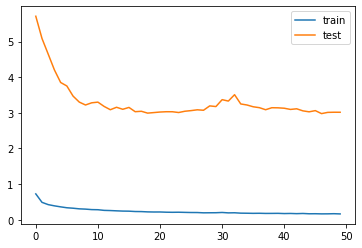

In [15]:
# define encoder
visible = Input(shape=(current_dims,))
# encoder level 1
e = Dense(current_dims*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
'''e = Dense(current_dims)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)'''

# bottleneck
n_bottleneck = encoded_dims
bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
d = Dense(current_dims)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
'''d = Dense(current_dims*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)'''

# output layer
output = Dense(current_dims, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
#plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [16]:
encoder = Model(inputs=visible, outputs=bottleneck)

In [17]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

## MLP Classifier on encoded data

In [20]:
from sklearn.neural_network import MLPClassifier

#LBFGS is the optimizer, which works relatively better when applied on 
#smaller datasets because it's a local search algorithm
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(2,2), random_state=1)

clf.fit(X_train_encode, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(2, 2), random_state=1)

In [22]:
y_pred = clf.predict(X_test_encode)
lr_probs = clf.predict_proba(X_test_encode)
lr_probs = lr_probs[:, 1]

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tn=cm[0][0] #tn
fn=cm[0][1] #fn
fp=cm[1][0] #fp
tp=cm[1][1] #tp
acc= (tp+tn)/(tp+tn+fn+fp)
epsilon = 1e-7 # is used so that to avoid divide by zero error
precision = tp / (tp + fp + epsilon)
recall = tp / (tp + fn + epsilon)
sensitivity,specificity = tp/(tp+fn),tn/(tn+fp)
print("Test accuracy is:"+str(format(acc,'.4f')))
print("Precision: "+str(format(precision,'.4f'))+" Recall: "+str(format(recall,'.4f')))

Test accuracy is:0.9363
Precision: 0.9410 Recall: 0.9357


In [28]:
scores = cross_val_score(clf, X_train, y_train, cv=2)
print('Average CV Score: ',scores.mean())

Average CV Score:  0.9469400782343149


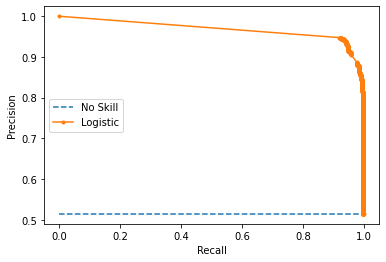

F1: 0.9383328168577626
AUC: 0.9672632922910444
Accuracy 0.936340371081254


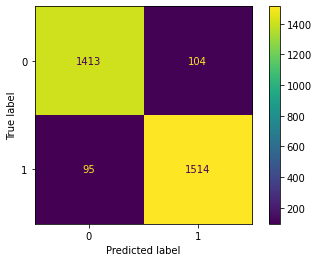

In [27]:
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
no_skill = len(y_test[y_test==1]) / len(y_test)
acc = accuracy_score(y_test, y_pred)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

print("F1:",lr_f1)
print("AUC:",lr_auc)
print("Accuracy",acc)

plot_confusion_matrix(clf, X_test_encode, y_test)